In [28]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
# Parameters
vocab_size = 10000
max_length = 32
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=20000

In [17]:
with open("../data/news/Sarcasm_Headlines_Dataset.json") as file_in:
    dataset = []
    for line in file_in:
        dataset.append(json.loads(line))

In [18]:
sentences=[]
labels=[]
urls=[]
for item in dataset:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])
    urls.append(item["article_link"])

In [19]:
training_sentences=sentences[0:training_size]
testing_sentences=sentences[training_size:]
training_labels=labels[0:training_size]
testing_labels=labels[training_size:]

In [20]:
# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

In [21]:
# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [22]:
# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [23]:
# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [27]:
num_epochs=30
history=model.fit(training_padded,training_labels,epochs=num_epochs,
                   validation_data=(testing_padded,testing_labels),verbose=2     
                )

Epoch 1/30
625/625 - 3s - loss: 0.5534 - accuracy: 0.7124 - val_loss: 0.3910 - val_accuracy: 0.8402 - 3s/epoch - 5ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3084 - accuracy: 0.8747 - val_loss: 0.3422 - val_accuracy: 0.8544 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2304 - accuracy: 0.9093 - val_loss: 0.3448 - val_accuracy: 0.8553 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 2s - loss: 0.1872 - accuracy: 0.9275 - val_loss: 0.3620 - val_accuracy: 0.8538 - 2s/epoch - 3ms/step
Epoch 5/30
625/625 - 2s - loss: 0.1544 - accuracy: 0.9443 - val_loss: 0.3914 - val_accuracy: 0.8495 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1310 - accuracy: 0.9519 - val_loss: 0.4451 - val_accuracy: 0.8387 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 1s - loss: 0.1106 - accuracy: 0.9617 - val_loss: 0.4682 - val_accuracy: 0.8429 - 1s/epoch - 2ms/step
Epoch 8/30
625/625 - 1s - loss: 0.0956 - accuracy: 0.9669 - val_loss: 0.5339 - val_accuracy: 0.8311 - 1s/epoch - 2ms/step
Epoch 9/30
625/625 - 2s 

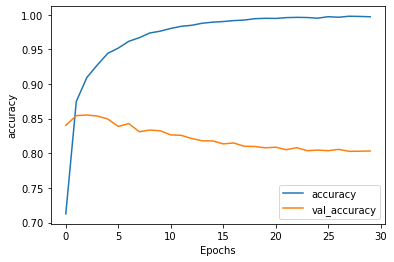

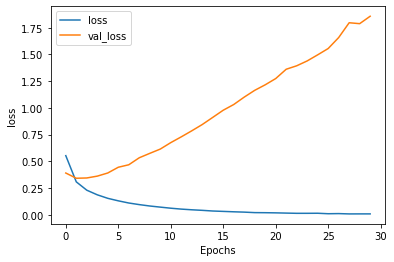

In [29]:
# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")